# Unemployment Data

The unemployment data was downloaded from [World Data] (https://data.worldbank.org/indicator/SL.UEM.TOTL.ZS) that represent the **total** % of labor force in different countries.
The source says that the data was retrieved in September 20, 2020.

Here we would explore the data from different countries.

# Set-up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

### Load data

The firts rows from the file can be skipped as the table is present after 4 rows. Also there are two columns that we can remove at the begging as they are not useful.

In [2]:
df_world = pd.read_csv("Unemployment_total.csv", 
                       skiprows=4).drop(["Indicator Name", "Indicator Code"], axis = 1)

df_world.head()

,Country Name,Country Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11.508,11.534,11.448,11.387,11.313,11.184,11.057,11.118,11.164,NaN
2,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.379,7.400,7.331,7.282,7.223,7.119,7.019,6.886,6.774,NaN
3,Albania,ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.376,15.866,17.490,17.080,15.220,13.750,12.340,12.331,12.813,NaN
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_world.shape

(264, 64)

As we can see there are coulmns that do not have information (`NaN`). First we can remove the colums that all values are NaN.

In [4]:
#Columns with all NaN in rows
columns_na = df_world.columns[~(df_world.isna().sum() >= df_world.shape[0])]

# Data frame without columns wiht all NaN
world = df_world[columns_na]
world.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,11.218000,11.293000,11.442000,11.470000,11.477000,11.499000,11.480,11.472000,...,11.488,11.508,11.534,11.448,11.387,11.313,11.184,11.057,11.118,11.164
2,Angola,AGO,3.708000,3.740000,3.804000,3.816000,3.819000,3.829000,3.821,3.818000,...,7.362,7.379,7.400,7.331,7.282,7.223,7.119,7.019,6.886,6.774
3,Albania,ALB,16.190001,16.285999,16.478001,16.511999,16.521999,16.549999,16.525,16.516001,...,13.481,13.376,15.866,17.490,17.080,15.220,13.750,12.340,12.331,12.813
4,Andorra,AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The next step is remove the rows that have in all the columns `NaN` values.

In [5]:
# rows that have more than 20 values as NaN
rows_na = world.index[~(world.isna().sum(axis = 1) >= 20)]

# Remove Rows with more than 20 NaN
world_clean = world.iloc[rows_na,:]

world_clean.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Afghanistan,AFG,11.218000,11.293000,11.442000,11.470000,11.477000,11.499000,11.480000,11.472000,...,11.488000,11.508000,11.534000,11.448000,11.38700,11.313000,11.184000,11.057000,11.118000,11.164000
2,Angola,AGO,3.708000,3.740000,3.804000,3.816000,3.819000,3.829000,3.821000,3.818000,...,7.362000,7.379000,7.400000,7.331000,7.28200,7.223000,7.119000,7.019000,6.886000,6.774000
3,Albania,ALB,16.190001,16.285999,16.478001,16.511999,16.521999,16.549999,16.525000,16.516001,...,13.481000,13.376000,15.866000,17.490000,17.08000,15.220000,13.750000,12.340000,12.331000,12.813000
5,Arab World,ARB,11.448873,11.950842,12.757835,12.891821,13.174894,12.338868,11.827323,11.860329,...,10.284689,10.490773,10.574131,10.654627,10.67532,10.450945,10.641313,10.563344,10.336946,10.191472
6,United Arab Emirates,ARE,1.580000,1.635000,1.918000,1.820000,1.800000,2.000000,2.032000,2.093000,...,2.496000,2.509000,2.576000,2.212000,1.91000,1.636000,2.463000,2.229000,2.348000,2.447000


We have a dataset with 233 diferent countries and 32 columns which two of them repesent the **Country name** and the **Country Code** 

In [6]:
world_clean.shape

(233, 32)

### All Countries

From the dataframe we can see which are the contries with the hightest rate in the last year **2020**.

To improve more the analysis we can see the country code and the continent. To do that we can load the file with the country names and code.

In [7]:
country_code = pd.read_csv('Unemployment_country_info.csv')
country_code.head()

,Country Code,Region,IncomeGroup,SpecialNotes,TableName,Unnamed: 5
0,ABW,Latin America & Caribbean,High income,NaN,Aruba,NaN
1,AFG,South Asia,Low income,NaN,Afghanistan,NaN
2,AGO,Sub-Saharan Africa,Lower middle income,NaN,Angola,NaN
3,ALB,Europe & Central Asia,Upper middle income,NaN,Albania,NaN
4,AND,Europe & Central Asia,High income,NaN,Andorra,NaN


In [8]:
world_clean_sorted = world_clean.sort_values(by=['2020'],
                                             ascending=False).iloc[:30,:]

world_clean_sorted = pd.merge(world_clean_sorted, 
                              country_code.iloc[:,[0,1]],
                              how = "left",
                              on = "Country Code")

In [9]:
# Export the dataframe
world_clean.to_csv("./Unemployment_world_cleaned.csv", index=None)

In [10]:
# Regions present in the data
regions = world_clean_sorted['Region'].unique()

colors = ["#86592d", "#808080", "#006bb3", "#008000", "#b30000"]

regions_col = dict(zip(regions, colors))

# Map the values
world_clean_sorted['Region'] = world_clean_sorted['Region'].map(regions_col)

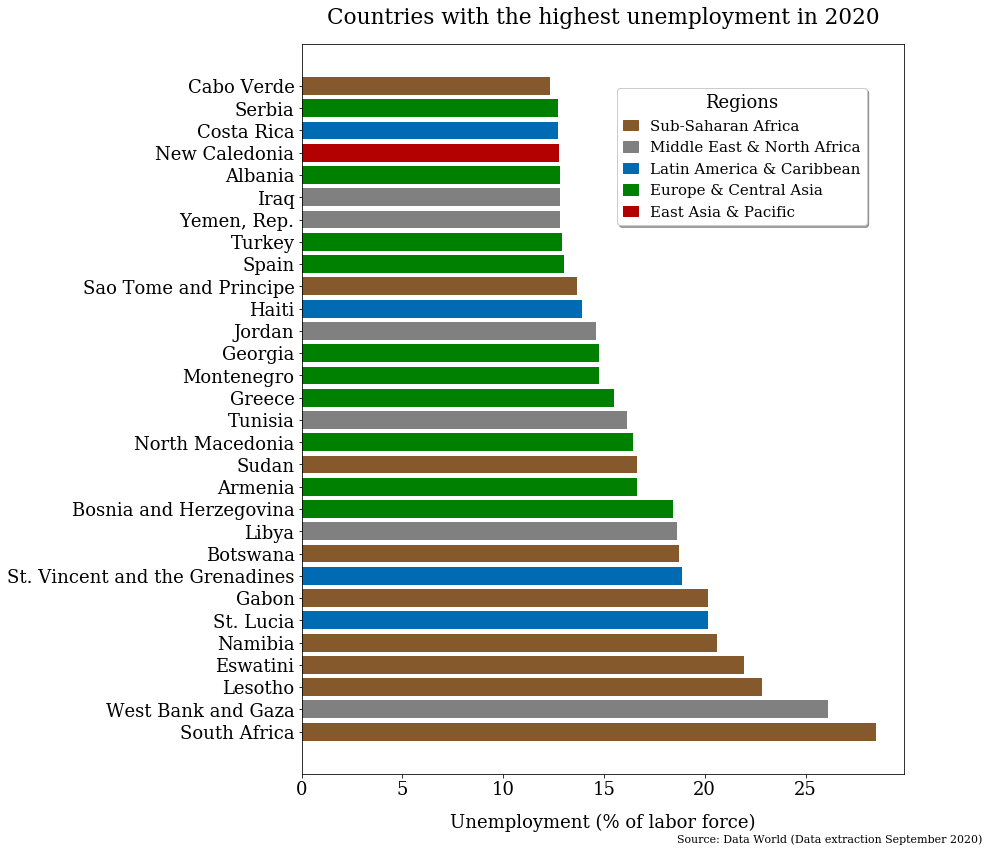

In [11]:
# Bar plot 20 Countries with the hightest unemployment rate
fig = plt.figure(figsize=(13,12))

# Adjust matplotlib parameters
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'serif'
params = {'legend.fontsize': 15,
          'legend.handlelength': 1}
plt.rcParams.update(params)


ax = plt.barh(world_clean_sorted['Country Name'], 
         world_clean_sorted['2020'], color =world_clean_sorted['Region']
         )
plt.ylabel('')
plt.xlabel('Unemployment (% of labor force)', labelpad =15)
plt.title('Countries with the highest unemployment in 2020', pad = 20) 
#plt.title("From the complete dataset it shows the 30 countries with the highest unemployment rate in 2020. \nSource: Data World (Data extractión September 2020)", fontsize=12, pad = 20)

# Source text
text = "Source: Data World (Data extraction September 2020)"
fig.text(0.9,0.01,text, ha="center", fontsize=11)

# Legend
labels = list(regions_col.keys())
handles = [plt.Rectangle((0,0),1,1, color = regions_col[label]) for label in labels]
plt.legend(handles, labels, bbox_to_anchor=(0.95,0.95), shadow = True, title = "Regions")

plt.tight_layout()
plt.savefig("DesempleosPaisesMasAltos.png", dpi = 300, bbox_to_inches = "tight", pad_inches=.1)
plt.show()

### Data filtering

The are several countries present in the table but for the moment we will select some of them using the **Country Code** from a file with selected countries.

From the filtered data we can make line chart.

In [12]:
selected_countries = pd.read_csv("./SelectedCountries.csv")

selected_countries = selected_countries['Country Code'].tolist()

# Filter
world_filter = world_clean[world_clean['Country Code'].isin(selected_countries)]

world_filter.head()

,Country Name,Country Code,1991,1992,1993,1994,1995,1996,1997,1998,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Afghanistan,AFG,11.218,11.293,11.442,11.470,11.477000,11.499000,11.480,11.472,...,11.488,11.508,11.534,11.448,11.387,11.313,11.184,11.057,11.118,11.164
6,United Arab Emirates,ARE,1.580,1.635,1.918,1.820,1.800000,2.000000,2.032,2.093,...,2.496,2.509,2.576,2.212,1.910,1.636,2.463,2.229,2.348,2.447
7,Argentina,ARG,5.440,6.360,10.100,11.760,18.799999,17.110001,14.820,12.650,...,7.180,7.217,7.100,7.268,7.750,7.977,8.347,9.220,9.789,10.436
11,Australia,AUS,9.579,10.729,10.874,9.719,8.469000,8.506000,8.362,7.676,...,5.081,5.224,5.662,6.077,6.054,5.710,5.591,5.298,5.268,5.328
12,Austria,AUT,3.420,3.590,4.250,3.535,4.347000,5.281000,5.149,5.523,...,4.564,4.865,5.335,5.620,5.723,6.014,5.499,4.848,4.674,4.779


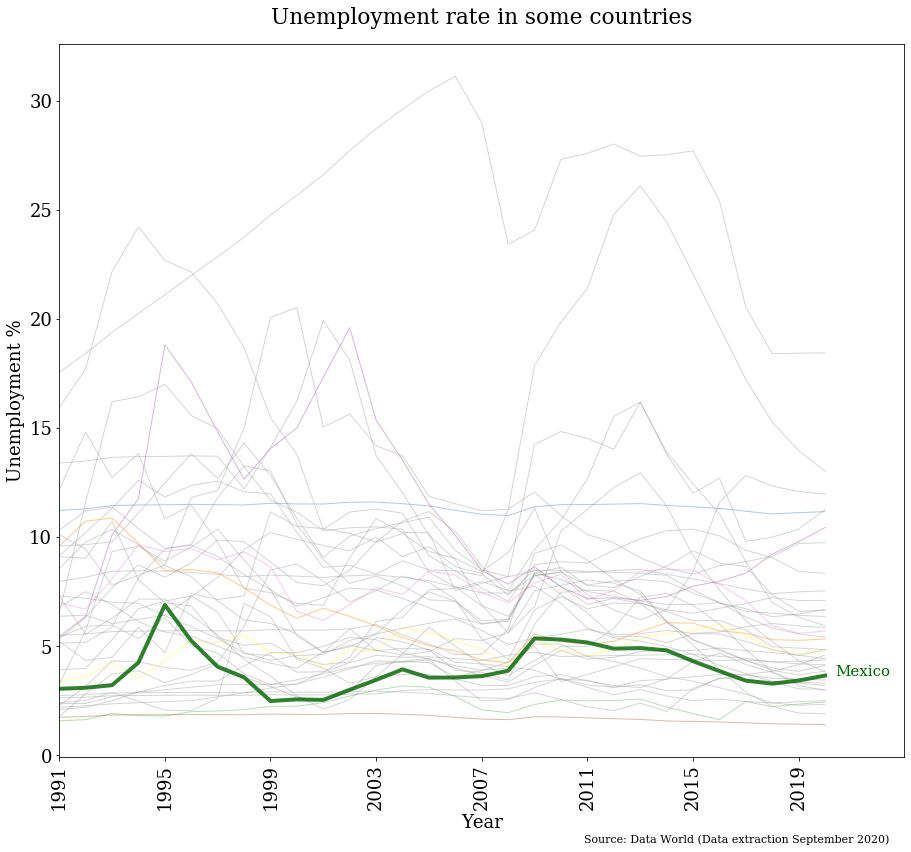

In [13]:
# Make a Spaguetti plot
## Data preparation
df = world_filter.drop(['Country Code'], axis = 1)
df.set_index("Country Name", inplace = True)
# For Flourish format
df.to_csv("Unemployment_selected.csv")

df = df.T.reset_index()
df = df.rename({"index":"Year"}, axis = 1)
df['Year'] = df['Year'].astype("int")

# Figure parameters
fig = plt.figure(figsize=(13,12))

# Adjust matplotlib parameters
plt.rcParams['font.size'] = 18
plt.rcParams['font.family'] = 'serif'
params = {'legend.fontsize': 12,
          'legend.handlelength': 1}
plt.rcParams.update(params)

# Create a color palette
palette = plt.get_cmap("Set1")

# Multiple line plot
num = 0
for column in df.drop('Year', axis = 1):
    num+=1
    plt.plot(df['Year'], df[column], 
             marker="",
             color=palette(num),
            linewidth=1,
            alpha = 0.4,
            label=column)

# Showing only Mexico
plt.plot(df['Year'], df['Mexico'], marker="",
        color="darkgreen", 
        linewidth=4, alpha=0.8)
    
# Add legend
#plt.legend(loc=2, ncol=2, bbox_to_anchor=(0.95,0.95))

plt.xlim(1991, 2023)
# Add a special annotation for Mexico
plt.text(2020.4, df.Mexico.tail(1), "Mexico",
        horizontalalignment="left", size="small",
        color="darkgreen")

# Add titles
plt.title("Unemployment rate in some countries", 
         pad=20)
plt.xlabel("Year")
plt.xticks(np.arange(min(df['Year']),
                     max(df['Year'])+1,
                     4),
           rotation=90)
plt.ylabel("Unemployment %")

# Source text
text = "Source: Data World (Data extraction September 2020)"
fig.text(0.8,0.01,text, ha="center", fontsize=11)

plt.tight_layout()
plt.savefig("DesempleoPaisesSeleccionados.png", 
            dpi = 300, 
            bbox_to_inches = "tight",
            pad_inches=.1)
plt.show()